In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

# TEORIA
Reglas para el calculo de parametros y dimensiones de las convoluciones.

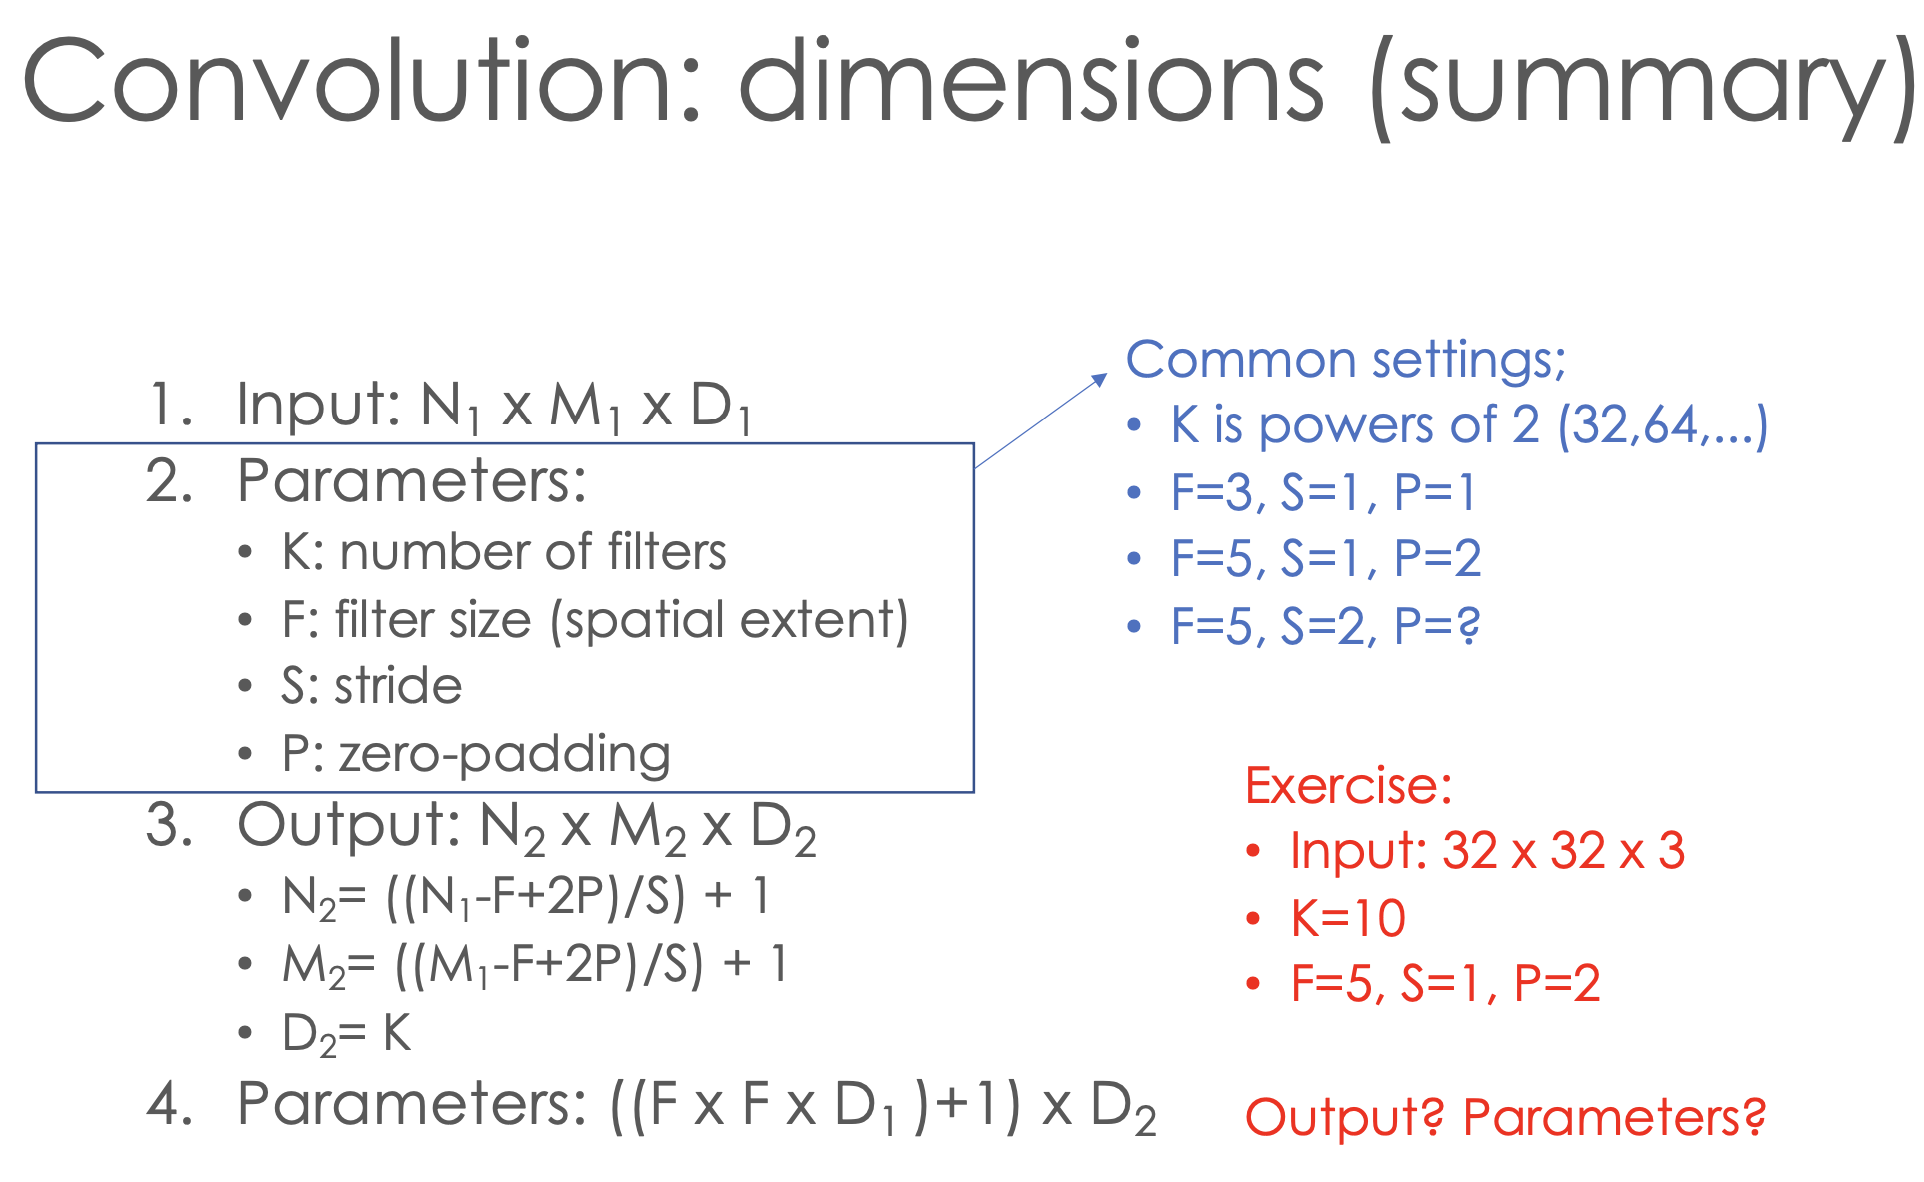

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


## CONVOLUCIÓN - 1
### - Input
*   N1=N2=28
*   D1=1
*   F=5
*   F=5
*   P=0(si no definidimos pading=0)
*   D2=32(definimos que queremos 32 filtros)


### - Output
*   N2=M2=((N1-F+2P)/S)+1 = ((28-5)/1)+1=**24 X 24 X 32**
*   Parameters = ((5 X 5 X 1)+1) X 32 = **832**

Entonces como entrada de la siguiente capa seria input_shape=(24, 24, 32), pero esto lo calcula automáticamente keras al enlazar con la sigueinte capa.

Como podemos ver, los parámetros coincide con lo que nos devuelve el summary de nuestro modelo.

## MAXPOOL - 1
Para el calculo de maxpool no es necesario parámetros, ya que lo único que hacemos es aplicar un algoritmo de reducción de la entrada que tenemos. Un ejemplo visual es


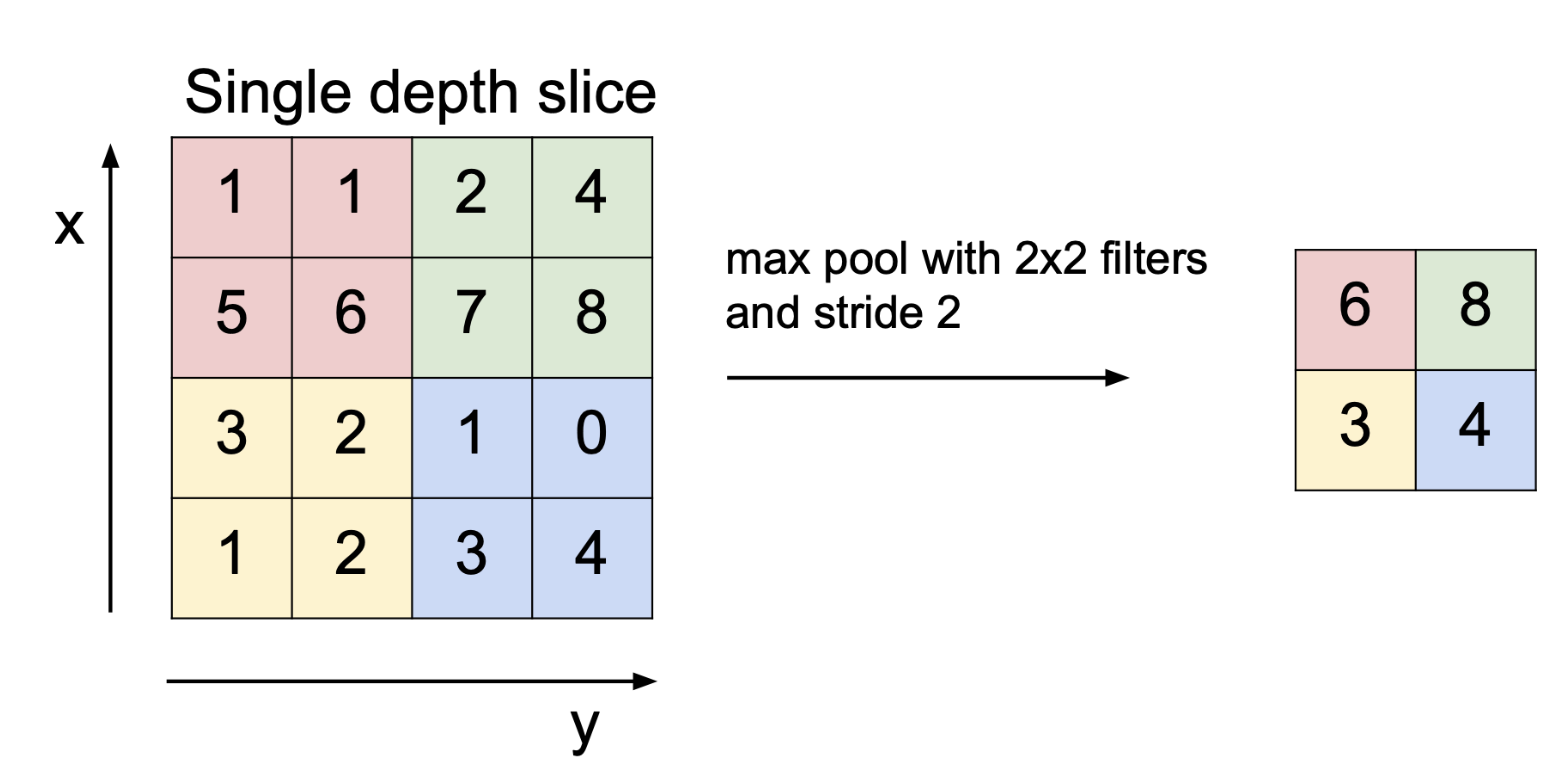

En esta imagen se puede ver el comportamiento del maxpool. Como vemos, simplemente reduce la información pero manteniendo ratio de la imagen.

El tamaño del filtro utilizado en la capa Conv2D es de 5x5 píxeles, pero el tamaño del filtro para el max pooling en la capa MaxPooling2D es independiente y puede ser diferente. En este caso, se ha especificado un tamaño de filtro de 2x2, lo que significa que se tomará el valor máximo dentro de cada ventana de 2x2 píxeles. El stride en el este maxpool es de 2, por tanto la salida será de 24/2 = 12, que es lo que podemos ver en el output.

A continuación, vamos a añadir una convolución y otro max pool nuevo.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (5, 5), activation='relu')) # ESTA
model.add(MaxPooling2D((2,2)))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


## CONVOLUCIÓN - 2
A continuación añadimos otra convolución, recordemos que esta entrada de la nueva convolución es (12, 12, 32), se ha explicado en la sección anterior. Como se puede ver, en esta segunda convolución no se ha definido el input_shape, ya que keras detecta automaticamente la entrada.

En esta nueva convolución, definimos 64 filtros y una ventana de 5X5. Vamos a calcular los parámetros y como será.

### - Input
*   N1=N2=12
*   D1=32
*   F=5
*   P=0 (si no definidimos pading=0)
*   D2=64 (definimos que queremos 64 filtros)


### - Output
*   N2=M2=((N1-F+2P)/S)+1 = ((12-5)/1)+1 = 8X8X64
*   Parameters = ((5 X 5 X 32)+1) X 64 = 51264 

Podemos ver que los parametros coinciden con la siguiente capa.

## MAXPOOL - 2

En este Maxpool hemos definido una ventana de 2X2. Como no definimos el stride, Keras coge el tamaño por defecto de nuestra ventana, entonces en este caso stride=2.

Luego del Maxpool, nos queda un output de (4, 4, 64).



# MODELO FINAL

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64, (5, 5), activation='relu')) 
model2.add(MaxPooling2D((2,2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

Para este modelo, podemos observar que estamos haciendo convoluciones. Para este ejercicio necesitamos tensores de 2D()

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Lo normal, es que x_train y x_test sea del tipo 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [ ]:
model2.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])

model2.fit(x_train, y_train,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model2.evaluate(x_test,y_test)
print("Accuracy: ", test_acc)

Epoch 1/5
600/600 [==============================] - 75s 125ms/step - loss: 0.9294 - accuracy: 0.7733
Epoch 2/5
600/600 [==============================] - 67s 112ms/step - loss: 0.2547 - accuracy: 0.9253
Epoch 3/5
600/600 [==============================] - 65s 109ms/step - loss: 0.1829 - accuracy: 0.9463
Epoch 4/5
600/600 [==============================] - 70s 117ms/step - loss: 0.1464 - accuracy: 0.9573
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.1034 - accuracy: 0.9691
Accuracy:  0.9690999984741211


Podemos ver que respecto al ejemplo del otro fichero, este ha mejorado mucho su 'Accuracy', pero el entrenamiento ha sido muy lento comparado con el anterior. Esto es debido a que solo estamos utilizando la CPU. Sería interesante a partir de este momento trabajar con tarjetas gráficas para el entrenamiento.

Para este problema el conjunto de datos es bastante sencillo.